In [3]:
!pip install highlight_text
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import highlight_text

In [6]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

In [8]:
df = pd.read_csv('1995_96 - 2020 Premier league standings.csv')

In [10]:
df

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year
0,1,Manchester Utd,38,25,7,6,73,35,82,41001,Eric Cantona - 14,Peter Schmeichel,1996
1,2,Newcastle Utd,38,24,6,8,66,37,78,36501,Les Ferdinand - 25,Shaka Hislop,1996
2,3,Liverpool,38,20,11,7,70,34,71,39553,Robbie Fowler - 28,David James,1996
3,4,Aston Villa,38,18,9,11,52,35,63,37492,Dwight Yorke - 17,Mark Bosnich,1996
4,5,Arsenal,38,17,12,9,49,32,63,32614,Ian Wright - 15,David Seaman,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,16,West Ham,38,10,9,19,49,62,39,44155,Michail Antonio - 10,Łukasz Fabiański,2020
496,17,Aston Villa,38,9,8,21,41,67,35,28505,Jack Grealish - 8,Tom Heaton,2020
497,18,Bournemouth,38,9,7,22,40,65,34,7745,Callum Wilson - 8,Aaron Ramsdale,2020
498,19,Watford,38,8,10,20,36,64,34,15353,Troy Deeney - 10,Ben Foster,2020


In [12]:
df['GD'] = df['GF'] - df['GA']

In [13]:
df

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year,GD
0,1,Manchester Utd,38,25,7,6,73,35,82,41001,Eric Cantona - 14,Peter Schmeichel,1996,38
1,2,Newcastle Utd,38,24,6,8,66,37,78,36501,Les Ferdinand - 25,Shaka Hislop,1996,29
2,3,Liverpool,38,20,11,7,70,34,71,39553,Robbie Fowler - 28,David James,1996,36
3,4,Aston Villa,38,18,9,11,52,35,63,37492,Dwight Yorke - 17,Mark Bosnich,1996,17
4,5,Arsenal,38,17,12,9,49,32,63,32614,Ian Wright - 15,David Seaman,1996,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,16,West Ham,38,10,9,19,49,62,39,44155,Michail Antonio - 10,Łukasz Fabiański,2020,-13
496,17,Aston Villa,38,9,8,21,41,67,35,28505,Jack Grealish - 8,Tom Heaton,2020,-26
497,18,Bournemouth,38,9,7,22,40,65,34,7745,Callum Wilson - 8,Aaron Ramsdale,2020,-25
498,19,Watford,38,8,10,20,36,64,34,15353,Troy Deeney - 10,Ben Foster,2020,-28


In [14]:
y=df.Rk
x=df.GD.values.reshape(-1,1)

In [15]:
x.shape

(500, 1)

In [16]:
y.shape

(500,)

In [17]:
model = LinearRegression().fit(x,y)

In [18]:
r_sq = model.score(x,y)
intercept = model.intercept_
slope = model.coef_

In [19]:
y_pred = intercept + slope*x

findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Fon

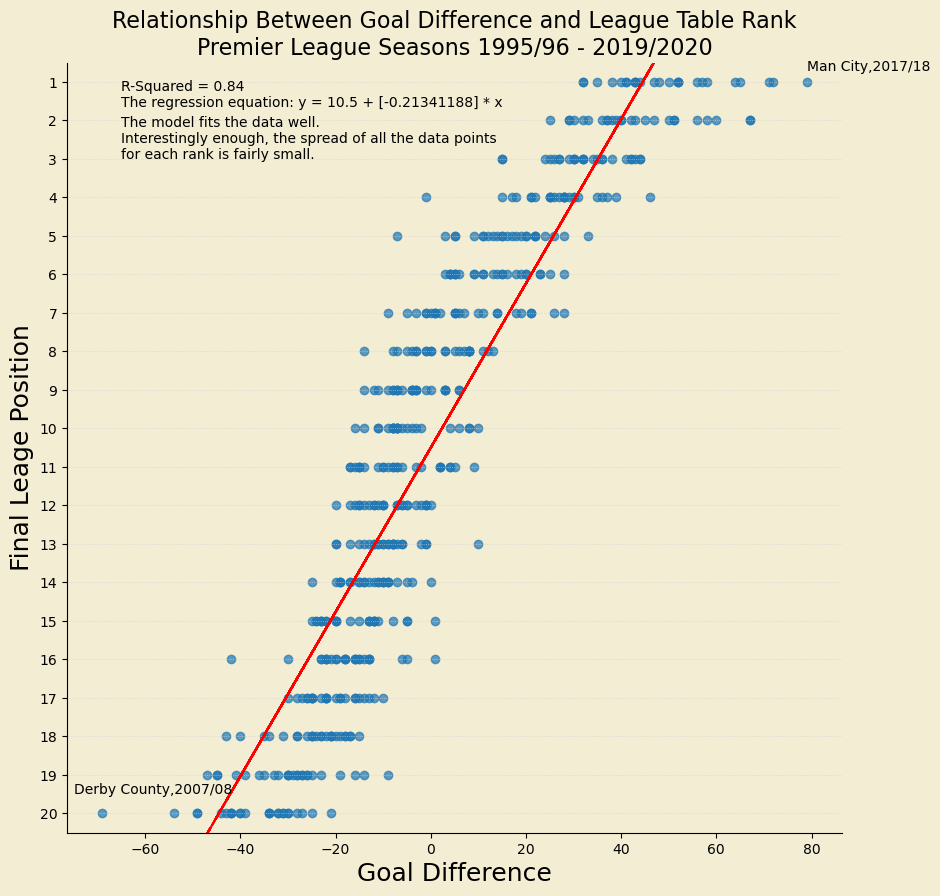

In [22]:
fig,ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('#f3edd3')
ax.patch.set_facecolor('#f3edd3')

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','right']
for i in spines:
    if i in spines:
        ax.spines[i].set_visible(False)

#plot data
plt.scatter(x,y,alpha=.7)
plt.plot(x,y_pred,c='red',linestyle='--',dashes=(5,5))


plt.ylim(.5,20.5)
plt.gca().invert_yaxis()

plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.xlabel('Goal Difference',fontsize=18,fontname='Andale Mono')
plt.ylabel('Final Leage Position',fontsize=18,fontname='Andale Mono')
plt.title('Relationship Between Goal Difference and League Table Rank\nPremier League Seasons 1995/96 - 2019/2020',ha='center',fontsize=16,fontname='Andale Mono')

#annotate teams
ax.annotate(xy=(79,.7),text='Man City,2017/18')
ax.annotate(xy=(-75,19.5),text='Derby County,2007/08')
#analysis
ax.annotate(xy=(-65,1.65),text=f'R-Squared = {round(r_sq,2)}\nThe regression equation: y = {intercept} + {slope} * x ',fontname='Andale Mono')
#ax.annotate(xy=(10,9),text='No team that finished 9th underperformed the model',fontname='Andale Mono')
#ax.annotate(xy=(-5,17),text='No team that finished 17th overperformed the model',fontname='Andale Mono')
ax.annotate(xy=(-65,3),text=f'The model fits the data well.\nInterestingly enough, the spread of all the data points\nfor each rank is fairly small.',fontname='Andale Mono')

plt.savefig('premline.png',dpi=300,bbox_inches = 'tight',facecolor='#f3edd3')